      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

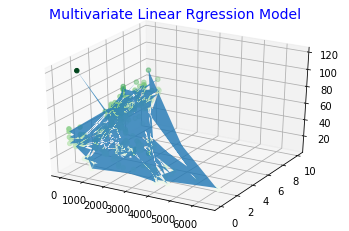

In [ ]:



import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

dataset = pd.read_csv('RealEstate.csv')  
print(dataset)

X_train, X_test, X2_train, X2_test, Y_train, Y_test= train_test_split(dataset.loc[:,'X3 distance to the nearest MRT station'],dataset.loc[:,'X4 number of convenience stores'],dataset.loc[:,'Y house price of unit area'], test_size = 0.2, random_state = 0)

X1 = np.array(X_train)
X2 = np.array(X2_train)
Y  = np.array(Y_train)
print(dataset) 



# LENGTH FUNCTION
def Len(List):
    n=0
    for i in List:
        n+=1    
    return n



def SUM(a):
    sum =0
    for i in a:
        sum+=i
    return sum


 
def Find_abs(value):
  return (value**2)**(0.5)




def Find_var_CSE(X):
  Total1 = 0
  Avgx = Mean_CSE(X)
  for i in range(Len(X)):
    Total1 += math.pow(X[i]-Avgx,2)
  FindVar = Total1/(Len(X)-1)
  return FindVar

def Find_cov_CSE(X,Y):
  Total2 = 0
  Avgx = Mean_CSE(X)
  Avgy = Mean_CSE(Y)
  for i in range(Len(X)):
    Total2 += (X[i]-Avgx)*(Y[i]-Avgy)
  Cov = Total2/(Len(X)-1)
  return Cov


def Find_b_CSE(X1,X2,Y):
    
  cov = Find_cov_CSE(X1,X2)
  var2 = Find_var_CSE(X2)
  b = Find_cov_CSE(X1,Y)*var2 -  Find_cov_CSE(X2,Y)*cov
  b /= (Find_var_CSE(X1)*var2   -  Find_cov_CSE(X1,X2)*cov)
  return b

def a_CSE(X1,X2,Y): 
  return Mean_CSE(Y) - Find_b_CSE(X1,X2,Y)*Mean_CSE(X1) -  Find_b_CSE(X2,X1,Y)*Mean_CSE(X2)

def Predicted_Y_CSE(X1,X2,Y):
  Predicted_Y = []
  a = a_CSE(X1,X2,Y)
  b1 = Find_b_CSE(X1,X2,Y)
  b2 = Find_b_CSE(X2,X1,Y)
  for i in range(Len(X1)):
    Predicted_Y.append(a+b1*X1[i]+b2*X2[i])
  return np.array(Predicted_Y)

def Mean_CSE(x):
  return  SUM(x)/Len(x)

def Find_r2_CSE(X1,X2,Y):
  Total1 = 0
  Total2 = 0
  array = Predicted_Y_CSE(X1,X2,Y)
  Avg = Mean_CSE(Y)
  for i in range(Len(Y)):
    Total1 += math.pow(array[i]-Y[i],2)
    Total2 += math.pow(Y[i]-Avg,2)
  return 1-(Total1/Total2)

def Find_mse_CSE(X1,X2,Y):
  Total = 0
  array = Predicted_Y_CSE(X1,X2,Y)
  for i in range(Len(Y)):
    Total += math.pow(array[i]-Y[i],2)
  mse = Total/Len(Y)
  return mse

def Find_mae_CSE(X1,X2,Y):
  Sum = 0
  arr = Predicted_Y_CSE(X1,X2,Y)
  for i in range(Len(Y)):
    Sum += Find_abs(arr[i]-Y[i])
  mae = Sum/Len(Y)
  return mae


print()


print('Mean Absolute Error = %.4f'%  Find_mae_CSE(X1,X2,Y))
print('Mean Squared Error = %.4f'%  Find_mse_CSE(X1,X2,Y))
print('R2 score = %.2f'%  Find_r2_CSE(X1,X2,Y))

b1 = Find_b_CSE(X1,X2,Y)
b2 = Find_b_CSE(X2,X1,Y)
a = Mean_CSE(Y) - b1*Mean_CSE(X1)-b2*Mean_CSE(X2)

Equ = a+b1*X1+b2*X2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X1, X2, Y, c=Y, cmap='Greens');

vertices = [list(zip(X1,X2,Y))]

poly = Poly3DCollection(vertices, alpha=0.8)
ax.add_collection3d(poly)


plt.title("Multivariate Linear Rgression Model",fontsize=14,color="blue")
plt.show()



